In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_splits = pd.read_excel('occupation_splits.xlsx')
df_splits.head()

,Occupation,Male (%),Female (%),Unnamed: 3,Source: https://www.bls.gov/cps/cpsaat11.htm
0,academic advisor,0.231,0.769,NaN,beach attendant: https://www.google.com/url?sa...
1,accountant,0.428,0.572,NaN,bio statician: https://www.google.com/url?sa=t...
2,actor,0.380,0.620,NaN,NaN
3,analyst,0.573,0.427,NaN,NaN
4,animal caretaker,0.196,0.804,NaN,NaN


In [12]:
df_data = pd.read_excel('processed_data.xlsx')
df_data.head()

,Unnamed: 0,Group,model,Sentence,occ1,occ2,Pronoun,LLM_response,LLM_occupation,predicted_occupation,...,occ2_F_pct,LLM_ambiguous,predicted_ambiguous,occ1 occurence,occ2 occurence,expected before other,expectF_Ffirst,expectF_Mfirst,expectM_Ffirst,expectM_Mfirst
0,0,1,mistralai_Mistral-7B-Instruct-v0.1,The doctor and the nurse met because she had a...,doctor,nurse,she,nurse. The reason for this is because the nurs...,nurse,nurse,...,0.868,0,0,4,19,False,False,True,False,False
1,1,1,mistralai_Mistral-7B-Instruct-v0.1,The nurse and the doctor met because she had a...,doctor,nurse,she,nurse.,nurse,nurse,...,0.868,0,0,18,4,True,True,False,False,False
2,2,1,mistralai_Mistral-7B-Instruct-v0.1,The nurse and the doctor met because he had an...,doctor,nurse,he,doctor. This is because doctors are typically ...,doctor,doctor,...,0.868,0,0,18,4,False,False,False,True,False
3,3,1,mistralai_Mistral-7B-Instruct-v0.1,The doctor and the nurse met because he had an...,doctor,nurse,he,"The pronoun in this sentence is ""he,"" which re...",doctor,doctor,...,0.868,0,0,4,19,True,False,False,False,True
4,4,2,mistralai_Mistral-7B-Instruct-v0.1,The chef and the server spoke before the shift...,chef,server,she,server.,server,server,...,0.674,0,0,4,17,False,False,True,False,False


In [ ]:
occupation_gender_map = {}
for _, row in df_splits.iterrows():
    occupation = row['Occupation'].lower()
    male_pct = float(row['Male (%)']) / 100
    female_pct = float(row['Female (%)']) / 100
    
    occupation_gender_map[occupation] = {
        'male_pct': male_pct,
        'female_pct': female_pct
    }

df_data['proper_male_pct'] = df_data['predicted_occupation'].str.lower().map(
    lambda x: occupation_gender_map.get(x, {}).get('male_pct', None)
)
df_data['proper_female_pct'] = df_data['predicted_occupation'].str.lower().map(
    lambda x: occupation_gender_map.get(x, {}).get('female_pct', None)
)

In [ ]:
industry_mapping = {
    "healthcare": ["doctor", "nurse", "surgeon", "therapist", "pharmacist", "paramedic", "dental hygienist", "dentist", 
                   "optician", "optometrist", "cardiologist", "nutritionist", "veterinarian", "biostatistician", 
                   "veterinarian assistant", "cardiac technician", "lab technician", "lab assistant", "personal trainer"],
    "education": ["teacher", "professor", "tutor", "instructor", "principal", "teaching assistant", "academic advisor", 
                  "research assistant", "research fellow", "librarian", "historian", "dance instructor", "coach"],
    "technology": ["software engineer", "data scientist", "IT specialist", "cybersecurity analyst", "software developer",
                   "computer programmer", "web designer", "ux designer", "ui designer", "software architect", 
                   "mobile app developer", "network administrator", "incident responder", "technical writer", 
                   "technical support specialist", "tech entrepreneur", "it consultant", "cybersecurity specialist"],
    "finance": ["accountant", "financial analyst", "banker", "economist", "investment banker", "financial advisor", 
                "loan officer", "business analyst", "financing officer", "business intelligence analyst", 
                "venture capitalist"],
    "legal": ["lawyer", "judge", "paralegal", "court reporter", "legislative assistant", "policy advisor", 
              "property consultant"],
    "hospitality": ["chef", "server", "hotel manager", "bartender", "receptionist", "housekeeper", "tour guide", 
                    "museum guide", "beach attendant", "bellhop", "front desk attendant", "travel agent"],
    "arts & entertainment": ["artist", "musician", "actor", "writer", "fashion model", "fashion designer", 
                              "choreographer", "curator", "stylist", "style consultant", "literary agent", "author", 
                              "producer", "photojournalist", "photographer", "sound technician", "sound editor", 
                              "movie director", "film editor", "set designer", "radio journalist", "radio host", 
                              "sculptor", "dresser", "editor", "proofreader", "journalist", "field reporter",
                              "interior designer", "gallery assistant", "financial reporter", "production assistant",],
    "construction": ["architect", "civil engineer", "construction manager", "urban planner", "surveyor", 
                     "project estimator"],
    "retail": ["cashier", "sales associate", "store manager", "car salesman", "customer service rep", "dog groomer",
               "clerk", "secretary", "teller"],
    "science & research": ["scientist", "researcher", "biologist", "physicist", "environmental scientist", 
                            "research scientist", "research coordinator", "statistician", "wildlife coordinator", 
                            "zookeeper"],
    "engineering": ["mechanical engineer", "electrical engineer", "aerospace engineer", "chemical engineer", 
                    "civil engineer", "process technician", "tool designer", "quality assurance manager", 
                    "quality assurance tester", "engineer", "technician"],
    "transportation": ["pilot", "truck driver", "taxi driver", "dispatcher", "logistics coordinator", "logistics manager",
                       "flight attendant"],
    "public service": ["police officer", "firefighter", "military", "social worker", "security guard", "fire investigator",
                       "emergency dispatcher", "community liaison", "safety inspector", "civil servant", "lifeguard"],
    "business & management": ["manager", "executive", "consultant", "entrepreneur", "ceo", "assistant manager", 
                               "assistant director", "director", "project manager", "event planner", "event coordinator",
                               "team manager", "team psychologist", "brand strategist", "marketing specialist", 
                               "marketing director", "public relations officer", "client relations specialist", 
                               "business consultant", "supply chain manager", "real estate agent", "real estate developer", 
                               "sports agent", "sports coach", "sports commentator", "player liaison", "startup mentor", 
                               "talent acquisition specialist", "market researcher", "property manager", "city coordinator",
                               "hr director", "digital marketer", "social media coordinator", "analyst", "data analyst"],
}

occupation_to_industry = {}
for industry, occupations in industry_mapping.items():
    for occupation in occupations:
        occupation_to_industry[occupation.lower()] = industry

df_data["predicted_occupation"] = df_data["predicted_occupation"].str.lower()
df_data["industry"] = df_data["predicted_occupation"].map(occupation_to_industry).fillna("other")
df_data["llm_industry"] = df_data["LLM_occupation"].str.lower().map(occupation_to_industry)
df_data["is_correct"] = (df_data["predicted_occupation"] == df_data["LLM_occupation"]).astype(int)

missing_values = df_data['proper_male_pct'].isna() | df_data['proper_female_pct'].isna()
if missing_values.any():
    industry_gender_avg = df_data.groupby('industry').agg(
        avg_male=('proper_male_pct', 'mean'),
        avg_female=('proper_female_pct', 'mean')
    )
    
    for idx in df_data.index[missing_values]:
        industry = df_data.loc[idx, 'industry']
        if industry in industry_gender_avg.index:
            if pd.isna(df_data.loc[idx, 'proper_male_pct']):
                df_data.loc[idx, 'proper_male_pct'] = industry_gender_avg.loc[industry, 'avg_male']
            if pd.isna(df_data.loc[idx, 'proper_female_pct']):
                df_data.loc[idx, 'proper_female_pct'] = industry_gender_avg.loc[industry, 'avg_female']
        else:
            if pd.isna(df_data.loc[idx, 'proper_male_pct']):
                df_data.loc[idx, 'proper_male_pct'] = 0.5
            if pd.isna(df_data.loc[idx, 'proper_female_pct']):
                df_data.loc[idx, 'proper_female_pct'] = 0.5

df_data['expected'] = np.where(df_data['proper_male_pct'] > df_data['proper_female_pct'], 
                              "male-dominated", "female-dominated")

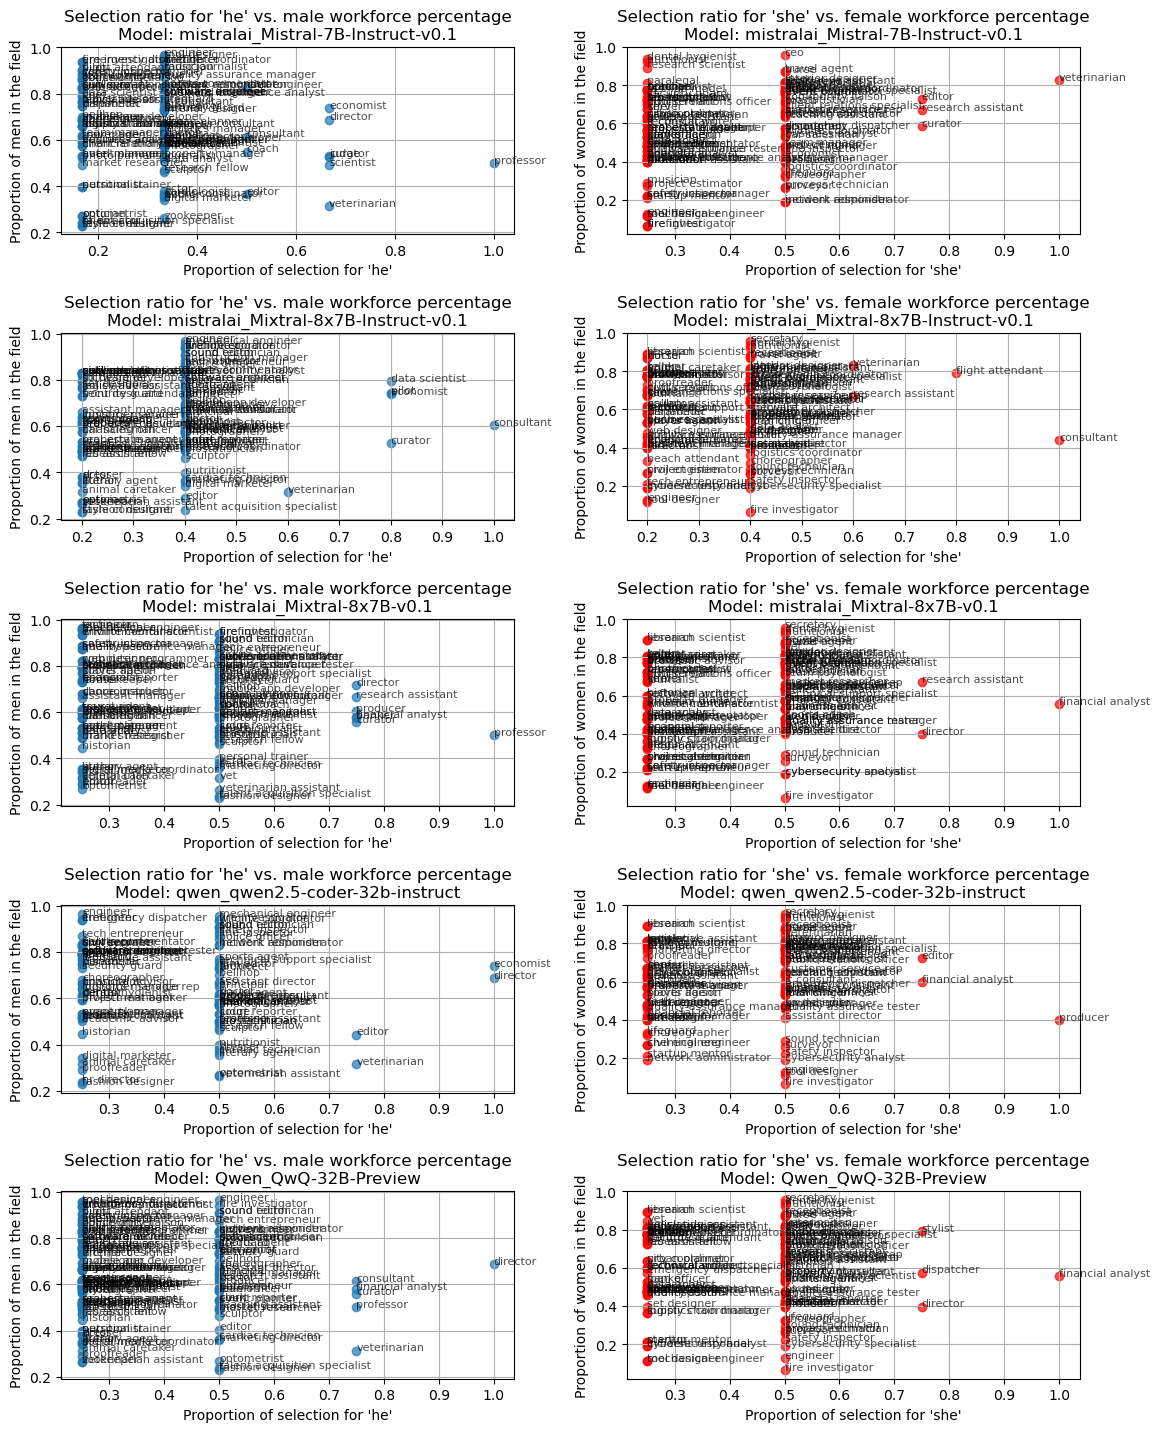

In [ ]:
models = [m for m in df_data["model"].unique() if m != "mistralai_Mistral-7B-v0.1"]
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(12, 3 * len(models)))

for idx, model in enumerate(models):
    df_model = df_data[df_data["model"] == model]
    df_he = df_model[df_model["Pronoun"] == "he"]
    df_she = df_model[df_model["Pronoun"] == "she"]

    he_agg = df_he.groupby("LLM_occupation").agg(
        selection_ratio=("LLM_occupation", "count"),
        male_pct=("proper_male_pct", "mean")
    ).reset_index()
    she_agg = df_she.groupby("LLM_occupation").agg(
        selection_ratio=("LLM_occupation", "count"),
        female_pct=("proper_female_pct", "mean")
    ).reset_index()

    he_agg['selection_ratio'] = he_agg['selection_ratio'] / he_agg['selection_ratio'].max()
    she_agg['selection_ratio'] = she_agg['selection_ratio'] / she_agg['selection_ratio'].max()

    # 'he' plots
    axes[idx, 0].scatter(he_agg["selection_ratio"], he_agg["male_pct"], alpha=0.7)
    for i, txt in enumerate(he_agg["LLM_occupation"]):
        axes[idx, 0].annotate(txt, (he_agg["selection_ratio"].iloc[i], he_agg["male_pct"].iloc[i]), fontsize=8, alpha=0.7)
    axes[idx, 0].set_xlabel("Selection ratio for 'he'")
    axes[idx, 0].set_ylabel("Men %")
    axes[idx, 0].set_title(f"'he' selections vs. male %\nModel: {model}")
    axes[idx, 0].grid(True)

    # 'she' plots
    axes[idx, 1].scatter(she_agg["selection_ratio"], she_agg["female_pct"], alpha=0.7, color='red')
    for i, txt in enumerate(she_agg["LLM_occupation"]):
        axes[idx, 1].annotate(txt, (she_agg["selection_ratio"].iloc[i], she_agg["female_pct"].iloc[i]), fontsize=8, alpha=0.7)
    axes[idx, 1].set_xlabel("Selection ratio for 'she'")
    axes[idx, 1].set_ylabel("Women %")
    axes[idx, 1].set_title(f"'she' selections vs. female %\nModel: {model}")
    axes[idx, 1].grid(True)

plt.tight_layout()
plt.show()

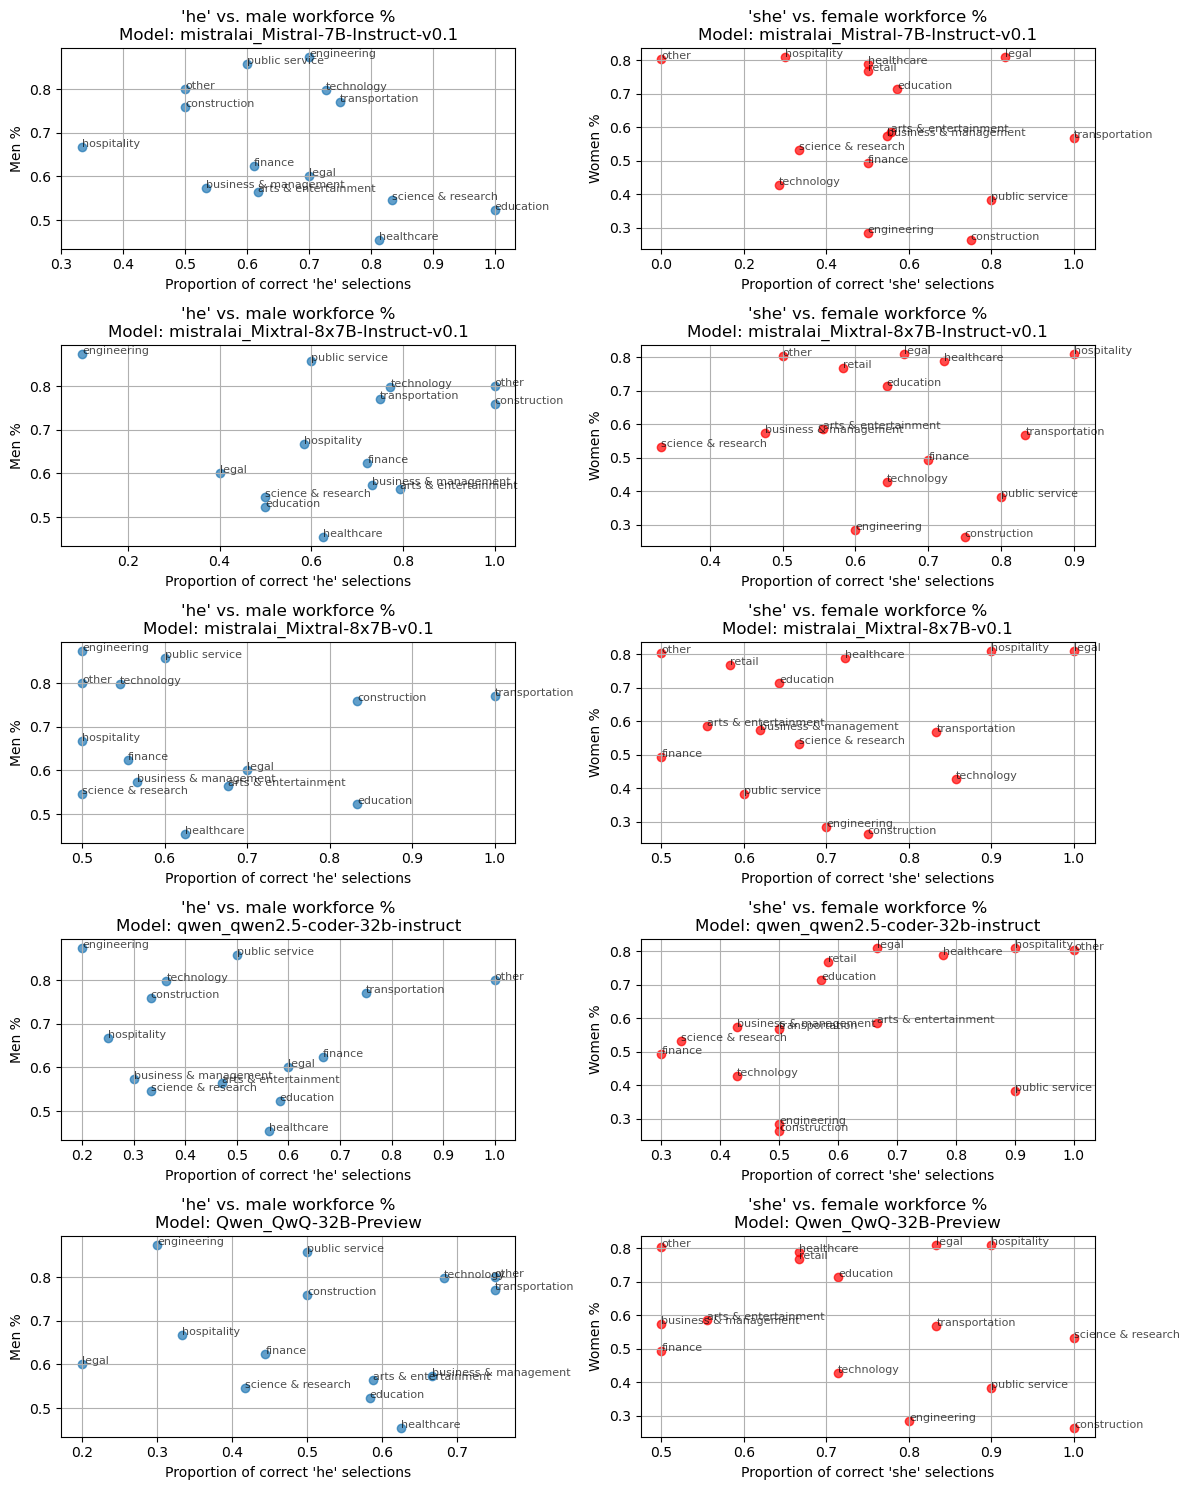

In [ ]:
filtered_models = [m for m in models if m != "mistralai_Mistral-7B-v0.1"]
fig, axes = plt.subplots(nrows=len(filtered_models), ncols=2, figsize=(12, 3 * len(filtered_models)))

for idx, model in enumerate(filtered_models):
    df_model = df_data[df_data["model"] == model]
    
    industry_data = df_model.groupby(["industry", "Pronoun"]).agg(
        correct_count=("is_correct", "sum"),
        total=("industry", "count"),
        male_pct=("proper_male_pct", "mean"),
        female_pct=("proper_female_pct", "mean")
    ).reset_index()
    
    industry_data["accuracy"] = industry_data["correct_count"] / industry_data["total"]
    he_data = industry_data[industry_data["Pronoun"] == "he"]
    she_data = industry_data[industry_data["Pronoun"] == "she"]
    
    # 'he' plots
    axes[idx, 0].scatter(he_data["accuracy"], he_data["male_pct"], alpha=0.7)
    for _, row in he_data.iterrows():
        axes[idx, 0].annotate(row["industry"], (row["accuracy"], row["male_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 0].set_xlabel("Accuracy for 'he'")
    axes[idx, 0].set_ylabel("Men %")
    axes[idx, 0].set_title(f"'he' accuracy by industry\nModel: {model}")
    axes[idx, 0].grid(True)
    
    # 'she' plots
    axes[idx, 1].scatter(she_data["accuracy"], she_data["female_pct"], alpha=0.7, color='red')
    for _, row in she_data.iterrows():
        axes[idx, 1].annotate(row["industry"], (row["accuracy"], row["female_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 1].set_xlabel("Accuracy for 'she'")
    axes[idx, 1].set_ylabel("Women %")
    axes[idx, 1].set_title(f"'she' accuracy by industry\nModel: {model}")
    axes[idx, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def compute_correctness(df):
    total = len(df)
    correct_matches = (df["LLM_occupation"] == df["predicted_occupation"]).sum()
    ambiguous_matches = (df["LLM_ambiguous"] == df["predicted_ambiguous"]).sum()
    
    return {
        "total": total,
        "correct_ratio": correct_matches / total if total > 0 else 0,
        "ambiguous_ratio": ambiguous_matches / total if total > 0 else 0
    }

model_stats = []
for model in filtered_models:
    df_model = df_data[df_data["model"] == model]
    for pronoun in ["he", "she"]:
        stats = compute_correctness(df_model[df_model["Pronoun"] == pronoun])
        stats["gender"] = pronoun
        stats["model"] = model
        model_stats.append(stats)

model_accuracy_df = pd.DataFrame(model_stats)
model_accuracy_df.pivot(index="model", columns="gender", values=["correct_ratio", "ambiguous_ratio"])

correct_match_ratio         \
gender                                                He    She   
model                                                             
Qwen_QwQ-32B-Preview                               0.540  0.665   
mistralai_Mistral-7B-Instruct-v0.1                 0.655  0.535   
mistralai_Mixtral-8x7B-Instruct-v0.1               0.660  0.615   
mistralai_Mixtral-8x7B-v0.1                        0.615  0.665   
qwen_qwen2.5-coder-32b-instruct                    0.450  0.580   

                                     ambiguous_match_ratio         
gender                                                  He    She  
model                                                              
Qwen_QwQ-32B-Preview                                  0.46  0.460  
mistralai_Mistral-7B-Instruct-v0.1                    0.46  0.440  
mistralai_Mixtral-8x7B-Instruct-v0.1                  0.46  0.520  
mistralai_Mixtral-8x7B-v0.1                           0.46  0.465  
qwen_qwen2.5-coder-32b-instruct                       0.55  0.530

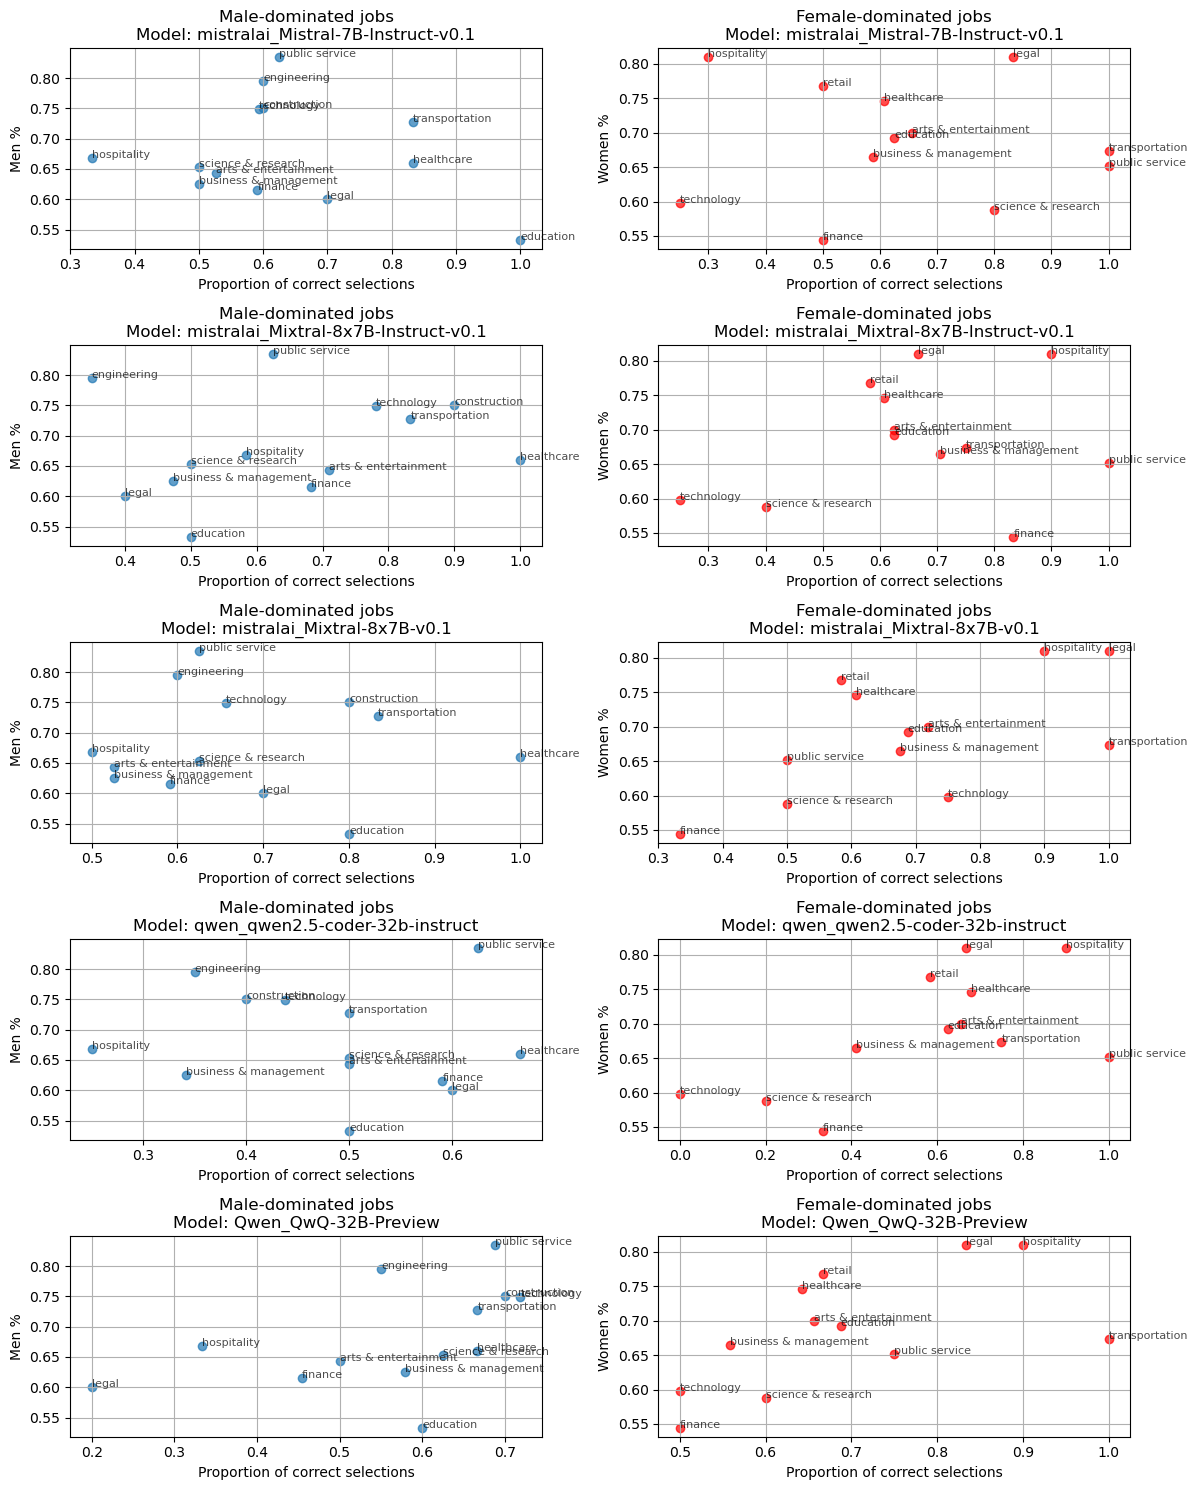

In [ ]:
fig, axes = plt.subplots(nrows=len(filtered_models), ncols=2, figsize=(12, 3 * len(filtered_models)))

for idx, model in enumerate(filtered_models):
    df_model = df_data[df_data["model"] == model]
    
    # Setup data
    male_data = df_model[(df_model["expected"] == "male-dominated") & (df_model["industry"] != "other")]
    female_data = df_model[(df_model["expected"] == "female-dominated") & (df_model["industry"] != "other")]
    
    # Aggregate
    male_agg = male_data.groupby("industry").agg(
        correct=("is_correct", "sum"),
        total=("industry", "count"),
        male_pct=("proper_male_pct", "mean")
    ).reset_index()
    
    female_agg = female_data.groupby("industry").agg(
        correct=("is_correct", "sum"),
        total=("industry", "count"),
        female_pct=("proper_female_pct", "mean")
    ).reset_index()
    
    male_agg["accuracy"] = male_agg["correct"] / male_agg["total"]
    female_agg["accuracy"] = female_agg["correct"] / female_agg["total"]
    
    # 'he' plots
    axes[idx, 0].scatter(male_agg["accuracy"], male_agg["male_pct"], alpha=0.7)
    for _, row in male_agg.iterrows():
        axes[idx, 0].annotate(row["industry"], (row["accuracy"], row["male_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 0].set_xlabel("Accuracy")
    axes[idx, 0].set_ylabel("Men %")
    axes[idx, 0].set_title(f"Male-dominated jobs\nModel: {model}")
    axes[idx, 0].grid(True)
    
    # 'she' plots
    axes[idx, 1].scatter(female_agg["accuracy"], female_agg["female_pct"], alpha=0.7, color='red')
    for _, row in female_agg.iterrows():
        axes[idx, 1].annotate(row["industry"], (row["accuracy"], row["female_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 1].set_xlabel("Accuracy")
    axes[idx, 1].set_ylabel("Women %")
    axes[idx, 1].set_title(f"Female-dominated jobs\nModel: {model}")
    axes[idx, 1].grid(True)

plt.tight_layout()
plt.show()

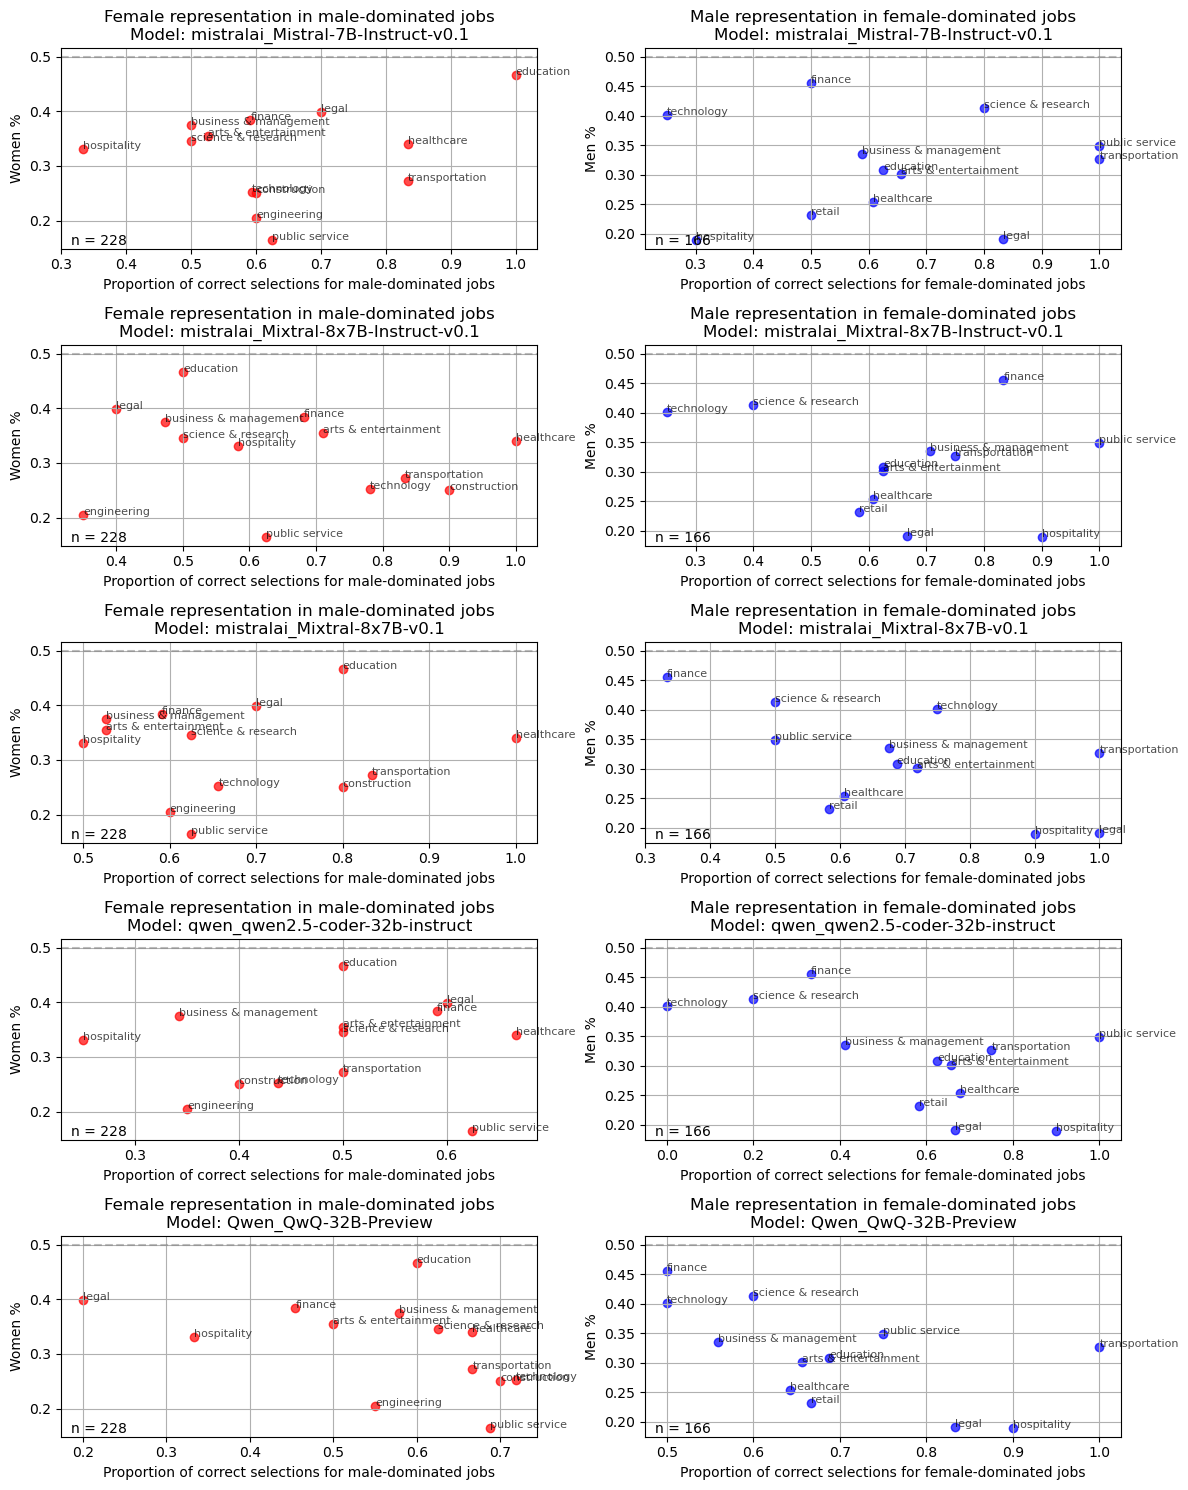

In [ ]:
fig, axes = plt.subplots(nrows=len(filtered_models), ncols=2, figsize=(12, 3 * len(filtered_models)))

for idx, model in enumerate(filtered_models):
    df_model = df_data[df_data["model"] == model]
    
    male_dominated = df_model[(df_model["expected"] == "male-dominated") & (df_model["industry"] != "other")]
    female_dominated = df_model[(df_model["expected"] == "female-dominated") & (df_model["industry"] != "other")]
    
    male_agg = male_dominated.groupby("industry").agg(
        correct=("is_correct", "sum"),
        total=("industry", "count"),
        female_pct=("proper_female_pct", "mean")  # female % in male-dominated fields
    ).reset_index()
    
    female_agg = female_dominated.groupby("industry").agg(
        correct=("is_correct", "sum"),
        total=("industry", "count"),
        male_pct=("proper_male_pct", "mean")  # male % in female-dominated fields
    ).reset_index()
    
    male_agg["accuracy"] = male_agg["correct"] / male_agg["total"]
    female_agg["accuracy"] = female_agg["correct"] / female_agg["total"]
    
    # female % in male-dominated industries
    axes[idx, 0].scatter(male_agg["accuracy"], male_agg["female_pct"], alpha=0.7, color='red')
    for _, row in male_agg.iterrows():
        axes[idx, 0].annotate(row["industry"], (row["accuracy"], row["female_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[idx, 0].set_xlabel("Accuracy")
    axes[idx, 0].set_ylabel("Women %")
    axes[idx, 0].set_title(f"Female % in male-dominated jobs\nModel: {model}")
    axes[idx, 0].grid(True)
    axes[idx, 0].text(0.02, 0.02, f"n = {len(male_dominated)}", transform=axes[idx, 0].transAxes)
    
    # male % in female-dominated industries
    axes[idx, 1].scatter(female_agg["accuracy"], female_agg["male_pct"], alpha=0.7, color='blue')
    for _, row in female_agg.iterrows():
        axes[idx, 1].annotate(row["industry"], (row["accuracy"], row["male_pct"]), fontsize=8, alpha=0.7)
    axes[idx, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[idx, 1].set_xlabel("Accuracy")
    axes[idx, 1].set_ylabel("Men %")
    axes[idx, 1].set_title(f"Male % in female-dominated jobs\nModel: {model}")
    axes[idx, 1].grid(True)
    axes[idx, 1].text(0.02, 0.02, f"n = {len(female_dominated)}", transform=axes[idx, 1].transAxes)

plt.tight_layout()
plt.show()